In [ ]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


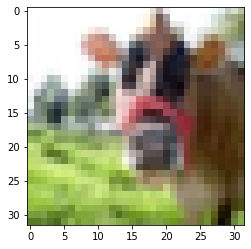

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

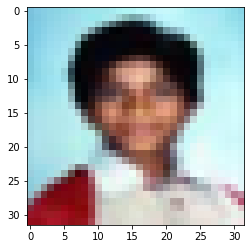

In [ ]:
plt.imshow(X_train[3])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(32,32,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(100,activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.utils import img_to_array, load_img

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2,callbacks=callback)

Epoch 1/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1610 - accuracy: 0.6547 - val_loss: 4.5945 - val_accuracy: 0.2915
Epoch 2/50
1250/1250 [==============================] - 17s 13ms/step - loss: 1.1202 - accuracy: 0.6635 - val_loss: 4.5985 - val_accuracy: 0.2821
Epoch 3/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0869 - accuracy: 0.6752 - val_loss: 4.7688 - val_accuracy: 0.2810
Epoch 4/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0610 - accuracy: 0.6845 - val_loss: 4.9343 - val_accuracy: 0.2839
Epoch 5/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0263 - accuracy: 0.6926 - val_loss: 5.0342 - val_accuracy: 0.2822
Epoch 6/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9967 - accuracy: 0.6969 - val_loss: 4.9636 - val_accuracy: 0.2740
Epoch 7/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9706 - accuracy: 0.7096 - val_loss: 5.1300 -